# 2022 DAILY STEPS ANALYSIS
<hr>

## Amos Moses Omofaiye *Data Analyst and Learning Facilitator*

### Table of Contents
<ol>
<li><a href="#intro">Introduction</a></li>
<li><a href="#source">Source of Data</a></li>
<li><a href="#range">Range of Data</a></li>
<li><a href="#objective">Objective</a></li>
<li><a href="#research">Research Questions</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#ida">Inferential Data Analysis</a></li>
<li><a href="#pred23">Predicting 2023 Steps</a></li>
<li><a href="#conclusion">Conclusions</a></li>
<li><a href="#references">References</a></li>
</ol>

<a id='intro'></a>
## Introduction
This notebook displays the analysis of my steps for five months in 2022 and the prdicted steps for 2023.

<a id='source'></a>
## Source
* The source of this data is the pacer app. The datasets are two. One contains episodic data based on periods of the day, and the other contains the total daily steps.
    - StartTime: This captured the time and the date the particular episode of the journey started.
    - EndTime: This captured the time and the date the particular episode of the journey ended.
    - Steps: This is the count od the steps taken during each episode. In this analysis, this will be the dependent variable.
    - Calories: This is the calories of energy burned during the episode.
    - Distance(meters): This is the distance in meters covered during the episode.
    - ActiveTime(seconds): This is the number of seconds that the episode lasted.
    - steps_category: Thsi is the category of count of steps. This could be *low, medium, high, or very high*.
    - active_minutes: Thsi is the number of minurtes used for the episode.
    - weekday: This is the week day in numbers on which the episode occured. It ranges from 1 to 7.
    - day_name: This is the name of the day on which the episode occured.
    - day_date: This captured the date on which the episode occurred.
    - month: This is the month of the year on which the episode occurred. It ranges from 1 to 12.
    - month_name: This captured the name of the month on which the episode occurred.
    - hour_of_day: This captured the hour of the day on which the episode occurred.
    - session: This is the period of the day on which the episode occurred. It could be *night, early morning, noon, evening, or late night*.
    - week_of_year: This is the nmmber of the week in the year in which the journey occurred. It ranges from 1 to 52.
    - work_location: This is the in which the episode occurred. It could either be *Ilorin* or *Baruten*.
    - total_daily_step: This is the aggregate count of all steps taken on the a day across the different episodes.

<a id='range'></a>
## Range
* The data was collected between August 3, 2022 and December 31, 2022. It is the reseacher's real distance covered data while visitind different places across three states in Nigeria.


<a id='source'></a>
## Objective
The objective of the analysis is to demonstrate the analysis of real-life data and to use the end product to improve the researcher's health management.



<a id='research'></a>
## Research Questions

The following research questions will be answered in this analysis.
     1. On which days of the weeks are most steps taken?
     2. Does location has an effect on the steps taken each day?
     3. What are the factors that can be used to predict the daily number of steps taken?
     4. What are the examples of the predicted steps for the first quarter of 2023?

<a id='eda'></a>
### Exploratory Data Analysis
In this section, and exploratory analysis of the two datasets cleaned for this analysis is be carried out.

In [2]:
# Importing the necessary libraries for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the background for the plots and amking them appear in the notebook directly
sns.set_style('darkgrid')
%matplotlib inline

In [3]:
# Loading the datasets
step_22 = pd.read_csv('processed_stage2.csv')

In [4]:
# Carrying out the descriptives for the data
# Viewing the first few rows
step_22.head()

,StartTime,EndTime,Steps,Calories,Distance(meters),ActiveTime(seconds),steps_category,active_minutes,weekday,day_name,day_date,month,month_name,hour_of_day,session,week_of_year,work_location
0,2022-08-03 20:30:00,2022-08-03 20:44:59,362,11,256,300,high,5.0,2,Wednesday,2022-08-03,8,August,20,Eve,31,baruten
1,2022-08-03 20:45:00,2022-08-03 20:59:59,501,15,355,360,high,6.0,2,Wednesday,2022-08-03,8,August,20,Eve,31,baruten
2,2022-08-03 22:00:00,2022-08-03 22:14:59,127,6,90,120,low,2.0,2,Wednesday,2022-08-03,8,August,22,Night,31,baruten
3,2022-08-04 07:15:00,2022-08-04 07:29:59,176,9,124,120,medium,2.0,3,Thursday,2022-08-04,8,August,7,Early Morning,31,baruten
4,2022-08-04 07:45:00,2022-08-04 07:59:59,130,8,92,60,low,1.0,3,Thursday,2022-08-04,8,August,7,Early Morning,31,baruten


In [7]:
# The variables in the dataset
print('The variables in this dataset are listed below.')
for i,v in enumerate(step_22.columns):
    print(i + 1,v)

The variables in this dataset are listed below.
1 StartTime
2 EndTime
3 Steps
4 Calories
5 Distance(meters)
6 ActiveTime(seconds)
7 steps_category
8 active_minutes
9 weekday
10 day_name
11 day_date
12 month
13 month_name
14 hour_of_day
15 session
16 week_of_year
17 work_location


In [8]:
# Shape: 17 columns across 2534 observations
step_22.shape

(2534, 17)

In [9]:
# Data type
step_22.dtypes

StartTime               object
EndTime                 object
Steps                    int64
Calories                 int64
Distance(meters)         int64
ActiveTime(seconds)      int64
steps_category          object
active_minutes         float64
weekday                  int64
day_name                object
day_date                object
month                    int64
month_name              object
hour_of_day              int64
session                 object
week_of_year             int64
work_location           object
dtype: object

In [11]:
# Are there null values? None
step_22.isnull().sum()

StartTime              0
EndTime                0
Steps                  0
Calories               0
Distance(meters)       0
ActiveTime(seconds)    0
steps_category         4
active_minutes         0
weekday                0
day_name               0
day_date               0
month                  0
month_name             0
hour_of_day            0
session                0
week_of_year           0
work_location          0
dtype: int64

In [12]:
# Describing the quantitative variables
step_22.describe()

,Steps,Calories,Distance(meters),ActiveTime(seconds),active_minutes,weekday,month,hour_of_day,week_of_year
count,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000
mean,438.921863,18.013418,319.551302,292.688240,4.878058,2.809787,10.096290,13.498421,41.994081
std,377.051585,14.135707,275.123989,247.862066,4.130965,1.876393,1.300871,5.073308,5.723767
min,1.000000,0.000000,0.000000,60.000000,1.000000,0.000000,1.000000,0.000000,1.000000
25%,139.000000,6.000000,101.000000,60.000000,1.000000,1.000000,9.000000,9.000000,38.000000
50%,312.500000,14.000000,227.500000,180.000000,3.000000,3.000000,10.000000,13.000000,42.000000
75%,646.000000,26.750000,468.750000,420.000000,7.000000,4.000000,11.000000,18.000000,47.000000
max,1805.000000,63.000000,1321.000000,900.000000,15.000000,6.000000,12.000000,23.000000,52.000000


    1. The steps ranges from 1 to 1805 per episode. The median step is 312.5. It can be seen that the step data does not appear to be normally distributed as the maxium value is 2.79 the 75th percentile.
    2. The calories burned ranges from 0 to 63. The distance covered ranges from 0 metres to 1321 metres. 
    3. All real quantitative variables have high range. Weekday, month, hour_of_day, and week_of_year are not real quantitative variables as they are just ordinals.

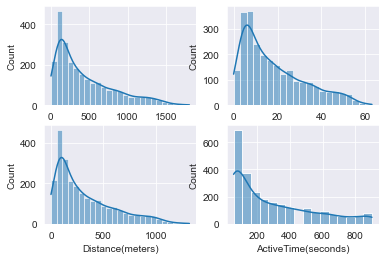

In [30]:
# Visualizing the distribution of the quantitaive variables
fig, axes = plt.subplots(2,2)

sns.histplot(step_22.Steps, kde=True, ax=axes[0,0]);
sns.histplot(step_22.Calories, kde=True, ax=axes[0,1]);
sns.histplot(step_22['Distance(meters)'], kde=True, ax=axes[1,0]);
sns.histplot(step_22['ActiveTime(seconds)'], kde=True, ax=axes[1,1]);

<img src="images.png" alt="Skeweness depiction"/>

As shown in the skeweness depictions above, all the quantitative variables are positively skewed (right skewed).

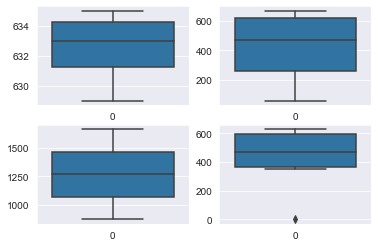

In [35]:
# Visualizing the distribution of the qualitative variables
fig, axes = plt.subplots(2,2)

sns.boxplot(step_22.steps_category.value_counts(), ax=axes[0,0]);
sns.boxplot(step_22.session.value_counts(), ax=axes[0,1]);
sns.boxplot(step_22.work_location.value_counts(), ax=axes[1,0]);
sns.boxplot(step_22.month_name.value_counts(), ax=axes[1,1]);

Cleaning Decision: For most of the research questions, the dataset will be used as it is. It will only be adjusted for predicting the steps in 2023.